<a href="https://colab.research.google.com/github/swan343/bin1/blob/main/Copy_of_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Essence of ML/SGD: 
for an unknown function f(x):
1. define an approximation function y(x):
for example y = ax + b, parameters = a and b
2. initialize parameters as tensors that calculates gradients
3. use an assessment (loss) function to see how far off is the approximation function to the data
4. calculate the parameters' gradient from that loss function 
5. adjust parameters
5. repeat 4-5

stochastic gradient descent:

stochastic: random

gradient: step 4

descent: step 5

in pytorch's terms:
1. define an approxiamtion function as 
def f(x):
2. initialize parameters as tensors that calculates gradients as 
params = tensors([a,b,c,...]).requires_gradient_()
3. use an assessment (loss) function to see how far off is the approximation function to the data as 
def loss_func(y1, y2):
4. calculate the parameters' gradient from that loss function as 
loss = loss_func(f(x), data)
loss.backwards()
params.grad
5. adjust params according to gradients as 
params.data -= params.gradient * some_rate
params.grad = None
6. repeat 4-5

In [ ]:
# tensor is a number/list/matrix; which is from (py)torch.tensor
from torch import tensor, arange
import matplotlib.pyplot as plt
print(tensor(5))
print(tensor([1,2,3, 4, 5]))


tensor(5)
tensor([1, 2, 3, 4, 5])


In [ ]:
# how does computer do calculus/calculate gradients:
def y(x, sum = True):
  # example function: y = 5x^2
  # derivative y' = 2*5x = 10x
  ys = (5 * x * x)
  if sum: return ys.sum() # this sum() is only for how pytorch's gradient calculation works with multiple x values
  else: return ys
# arange: a list of numbers
# float: gradient calculation needs to be a float (decimal) number
# tensor.requires_grad_(): enables gradient calculation
xt = arange(1, 21).float().requires_grad_()
print('xt,', xt)
# to calculate any math function: first make a tensor like tensor().requires_grad_(); 
print('yt,', y(xt, sum = False))
yt = y(xt, sum = True)
# then call that function as f(that_tensor).backward; (back propagation)
yt.backward()
# lastly call tensor.grad
print(xt.grad)

xt, tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20.], requires_grad=True)
yt, tensor([   5.,   20.,   45.,   80.,  125.,  180.,  245.,  320.,  405.,  500.,
         605.,  720.,  845.,  980., 1125., 1280., 1445., 1620., 1805., 2000.],
       grad_fn=<MulBackward0>)
tensor([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120.,
        130., 140., 150., 160., 170., 180., 190., 200.])


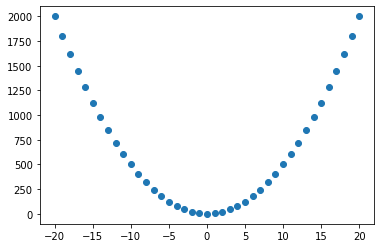

In [ ]:
# initial data: i'll just use x from -20 to 20 with 5x^2
xs = arange(-20., 21.)
ys = y(xs, sum = False)
#print(xs, ys)
plt.scatter(xs, ys)

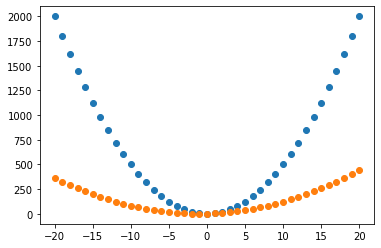

In [ ]:
def approximation_func(x, params):
  # say im approximating with y = ax^2 + bx + c
  return params[0] * x * x + params[1] * x + params[2]

# start with some guesses (typically randomized)
params = tensor([1.,2.,3.]).requires_grad_()
ax = plt.subplots()[1]
ax.scatter(xs, ys)
ax.scatter(xs, approximation_func(xs, params).detach().numpy())# w/o .detach().numpy() gives an error asking 4 .detach().numpy()

In [ ]:
# a way to evaluate how far off is the approximation to the data, use squared error: the sum of each element difference squared (to remove signs)
def se(y1, y2): return ((y1-y2)**2).sum()#.mean()
loss = se(approximation_func(xs, params), ys)
print('loss,',loss)
loss.backward()
print('gradient,',params.grad)

loss, tensor(23010880., grad_fn=<SumBackward0>)
gradient, tensor([-11528216.,     22960.,    -45674.])


new param, tensor([2.1528, 1.9977, 3.0046])


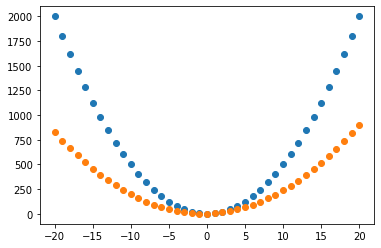

In [ ]:
learning_rate = 1e-7
params.data -= params.grad * learning_rate
print('new param,',params.data)
params.grad = None
ax = plt.subplots()[1]
ax.scatter(xs, ys)
ax.scatter(xs, approximation_func(xs, params).detach().numpy())# w/o .detach().numpy() gives an error asking 4 .detach().numpy()

loss, tensor(143.1295, grad_fn=<SumBackward0>)
gradient, tensor([-1.3216e+00,  3.3569e-04,  1.0208e+02])
new param, tensor([4.9889e+00, 1.0502e-06, 2.8040e+00])


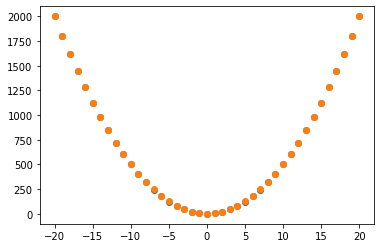

In [ ]:
# combine the two cells above and run a couple of times:

loss = se(approximation_func(xs, params), ys)
print('loss,',loss)
loss.backward()
print('gradient,',params.grad)
params.data -= params.grad * learning_rate
params.grad = None
print('new param,',params.data)
ax = plt.subplots()[1]
ax.scatter(xs, ys)
ax.scatter(xs, approximation_func(xs, params).detach().numpy())# w/o .detach().numpy() gives an error asking 4 .detach().numpy()

loss, tensor(143.1308, grad_fn=<SumBackward0>)
new param, tensor([4.9889e+00, 1.0502e-06, 2.8040e+00])


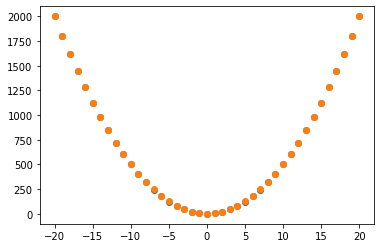

In [ ]:
# run 10k times:
for i in range(10000):
  loss = se(approximation_func(xs, params), ys)
  #print(loss)
  loss.backward()
  #print(params.grad)
  params.data -= params.grad * learning_rate
  params.grad = None
print('loss,',loss)
print('new param,',params.data)
ax = plt.subplots()[1]
ax.scatter(xs, ys)
ax.scatter(xs, approximation_func(xs, params).detach().numpy())# w/o .detach().numpy() gives an error asking 4 .detach().numpy()

to re-start, go up 6 cells above

questions:

we can see a is almost right (4.9885 to 5); b is almost right (very small 1e-5 to 0); c is quite not (2.9 to 0). how do i make c right/where could go wrong?

what happens if i use a wrong approximation function (linear or cubic?)

what happens if i use a too large/small gradient adjustment rate (called learning rate)?
*   too high: it will fly off
*   too low: X times more loops

what happens if initial guesses are way off?

when is a good time to stop?

can you make this work with mean squard error instead of sum squared error?